In [24]:
import cv2
from google.colab.patches import cv2_imshow # for image display
from skimage import io
import numpy as np
from matplotlib import pyplot as plt


# Downloading and showing images

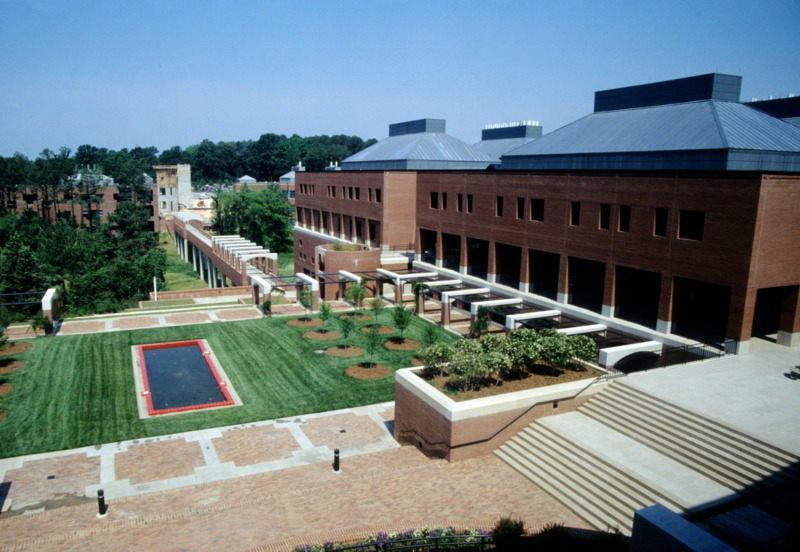

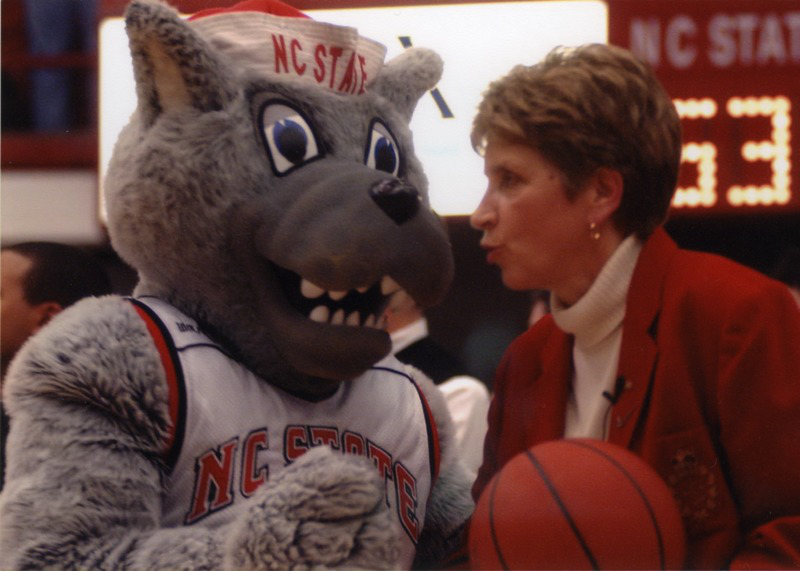

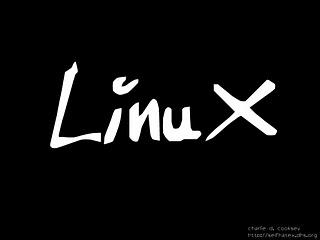

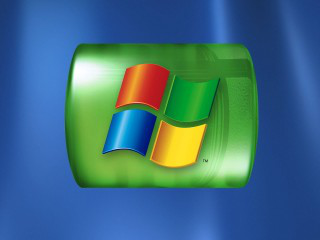

In [14]:
# Create a list to store the urls of the images
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
       "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
        "https://raw.githubusercontent.com/opencv/opencv/3.4/samples/data/LinuxLogo.jpg",
        "https://raw.githubusercontent.com/opencv/opencv/3.4/samples/data/WindowsLogo.jpg"]  

images = []

# Read and display the image
# loop over the image URLs, you could store several image urls in the list

for url in urls:
  image = io.imread(url)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  images.append(image)
      
  cv2_imshow(image)


# Sharpening images 

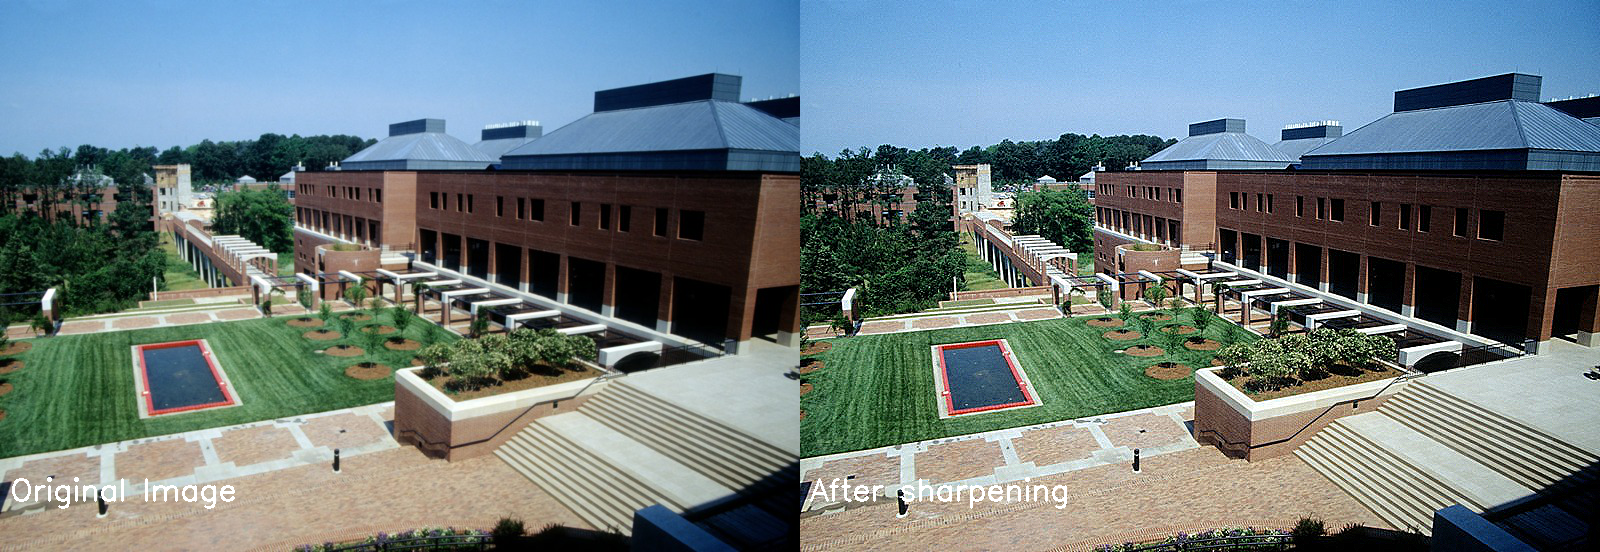

In [15]:
import numpy as np

kernel = np.array([[0, -1, 0],
                  [-1, 5, -1],
                  [0, -1, 0]], np.float32)  # kernel should be floating point type

org_image = images[0].copy()
dst1 = cv2.filter2D(org_image, -1, kernel)

cv2.putText(org_image,'Original Image',(10,500), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255),2)
cv2.putText(dst1,'After sharpening',(10,500), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255),2)

combined_images = np.hstack((org_image, dst1))
cv2_imshow(combined_images)

# Blending Two Images

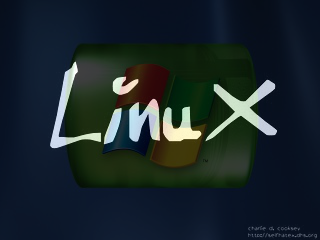

In [6]:
src1 = images[2]
src2 = images[3]

alpha = 0.75 

if 0 <= alpha <= 1:
  # [blend_images]
  beta = (1.0 - alpha)

  dst = cv2.addWeighted(src1, alpha, src2, beta, 0.0)
  # [blend_images]
  # [display]
  cv2_imshow(dst)
